In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('NFA 2019 public_data.csv')
df.head(5)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72186 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72186 non-null  object 
 1   year            72186 non-null  int64  
 2   country_code    72186 non-null  int64  
 3   record          72186 non-null  object 
 4   crop_land       51714 non-null  float64
 5   grazing_land    51714 non-null  float64
 6   forest_land     51714 non-null  object 
 7   fishing_ground  51713 non-null  float64
 8   built_up_land   51713 non-null  float64
 9   carbon          51713 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72185 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 6.6+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,72186.0,1.990263e+03,1.601876e+01,1961.00000,1977.000000,1991.000000,2.004000e+03,2.016000e+03
country_code,72186.0,1.556189e+02,3.902620e+02,1.00000,59.000000,121.000000,1.930000e+02,5.001000e+03
crop_land,51714.0,1.920772e+07,1.685819e+08,0.00000,0.358108,3.251810,3.610817e+06,3.984702e+09
grazing_land,51714.0,1.352875e+07,1.294180e+08,0.00000,0.194830,9.978667,1.734192e+06,3.417089e+09
fishing_ground,51713.0,1.004860e+07,1.081375e+08,0.00000,0.080054,6.154094,9.450000e+05,2.979605e+09
built_up_land,51713.0,1.984737e+06,1.730488e+07,0.00000,0.037863,0.204444,3.867180e+05,4.726163e+08
carbon,51713.0,3.072609e+07,3.989630e+08,0.00000,0.000000,0.000000,1.915736e+01,1.257160e+10
total,72177.0,7.792960e+07,7.455443e+08,0.01877,1.894023,8292.252511,1.532959e+07,2.061182e+10


In [5]:
df.describe(include=object)

,country,record,forest_land,QScore
count,72186,72186,51714,72185
unique,193,8,49103,5
top,World,BiocapTotGHA,0,3A
freq,448,9024,180,51481


In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(72186, 12)

In [8]:
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [9]:
df1 = df.dropna(axis = 0).reset_index(drop=True)
df1

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,0.097188051,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,334600,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,0.084003213,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,289207.1078,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.26E-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
51708,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5111762779.0,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
51709,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
51710,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
51711,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [10]:
df1.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

In [11]:
df1.shape

(51713, 12)

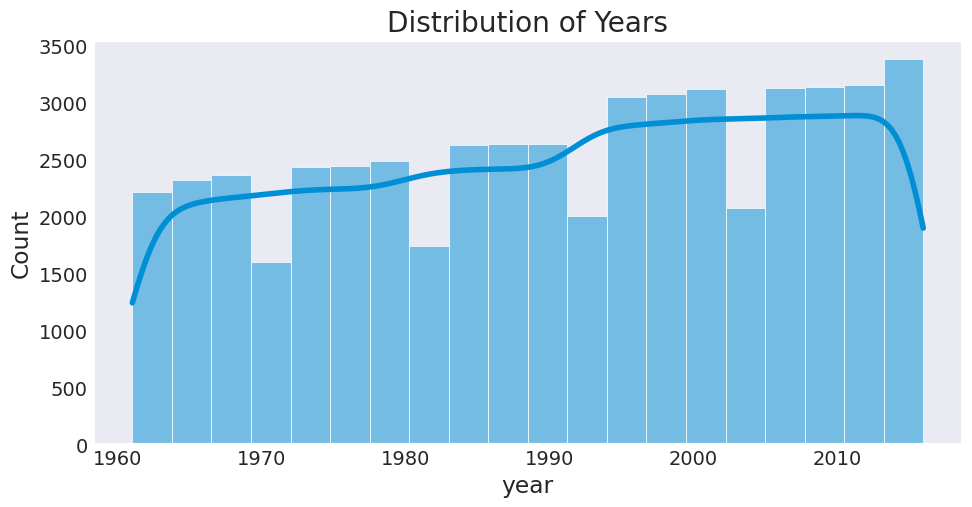

In [12]:
# Histogram for 'year'
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x='year', bins=20, kde=True)
plt.title('Distribution of Years')
plt.show()

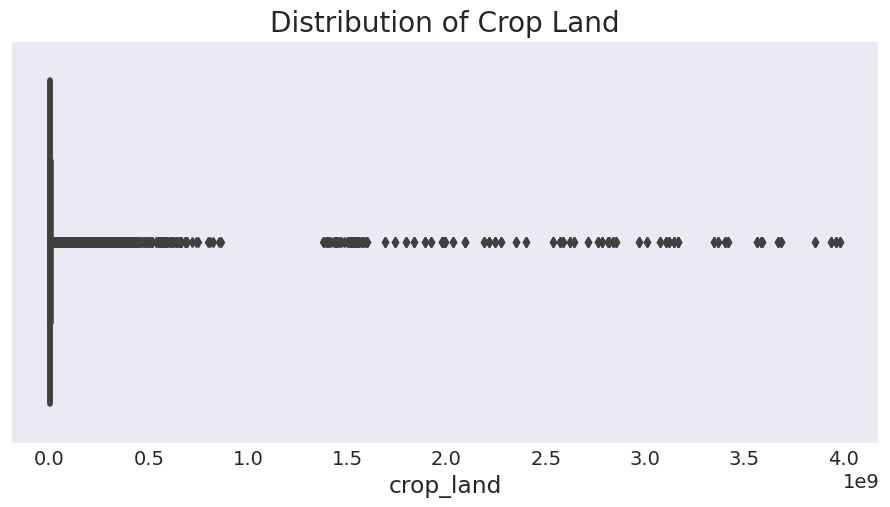

In [13]:
# Boxplot for 'crop_land'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, x='crop_land')
plt.title('Distribution of Crop Land')
plt.show()


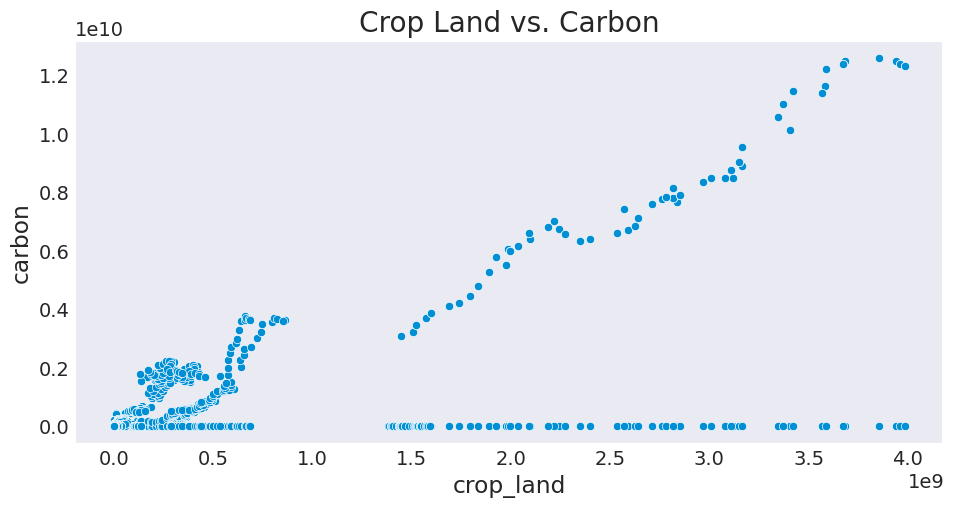

In [14]:
# Scatter plot for 'crop_land' and 'carbon'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='crop_land', y='carbon')
plt.title('Crop Land vs. Carbon')
plt.show()

In [15]:
#more preprocessing
df1 = df1.drop(columns=['country_code', 'country', 'year'])
X = df1.drop(columns='QScore')
y = df1['QScore']

In [16]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.value_counts()

QScore
3A    36030
2A      158
1A       11
Name: count, dtype: int64

In [17]:
#encode categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.record = encoder.fit_transform(x_train.record)
x_test.record = encoder.transform(x_test.record)

In [18]:
#There is still an imbalance in the class distribution. For this, we use SMOTE only on the training data to handle this.
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['record']))
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.drop(columns=['record']).columns)
normalised_train_df['record'] = x_train_balanced['record']

x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test.drop(columns=['record']))
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.drop(columns=['record']).columns)
normalised_test_df['record'] = x_test['record']

In [20]:
from sklearn.linear_model import LinearRegression, LogisticRegression

#Logistic Regression
logis= LogisticRegression()
logis.fit(normalised_train_df, y_balanced)

LogisticRegression()

In [21]:
# Predict on the test set
y_pred = logis.predict(normalised_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#print(f"Accuracy: {accuracy}")
print('Accuracy: {}'.format(round(accuracy*100), 2))
print(f"Classification Report:\n{classification_rep}")

Accuracy: 30
Classification Report:
              precision    recall  f1-score   support

          1A       0.00      0.40      0.00         5
          2A       0.00      0.35      0.01        66
          3A       1.00      0.30      0.46     15443

    accuracy                           0.30     15514
   macro avg       0.33      0.35      0.16     15514
weighted avg       0.99      0.30      0.46     15514



In [24]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(normalised_train_df, y_balanced)

RandomForestClassifier()

In [25]:
# Predict on the test set
y_pred = rfc.predict(normalised_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy: {}'.format(round(accuracy*100), 2))
print(f"Classification Report:\n{classification_rep}")

Accuracy: 75
Classification Report:
              precision    recall  f1-score   support

          1A       0.00      0.00      0.00         5
          2A       0.00      0.14      0.01        66
          3A       1.00      0.75      0.86     15443

    accuracy                           0.75     15514
   macro avg       0.33      0.30      0.29     15514
weighted avg       0.99      0.75      0.85     15514



### Random Forest Classifier works best on the data.